In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data(1).csv",low_memory=False) 

In [3]:
df_shape = df.shape
print("The original dataset has " + str(df_shape[0]) + " rows and " + str(df_shape[1]) + " columns")

The original dataset has 730178 rows and 59 columns


In [9]:
# encodes genres jaxx, electronic, folk/country, funk/soul/rnb, pop, rap/hip-hop, classical/baroque, rock
# this schema does not consider genres with multiple labels (e.g. "pop, rock") and only intakes the first genre label identified. 
lis = []
for d in df['true_genre']:
    if type(d) == str:
        d = d.lower()
        g = ''
        if 'jazz' in d:
            lis.append(1)
            continue
        if 'electronic' in d:
            lis.append(2)
            continue
        if ('folk' in d) or('country' in d):
            lis.append(3)
            continue
        if ('funk' in d) or ('soul' in d) or ('rnb' in d) or ('r&b' in d):
            lis.append(4)
            continue
        if 'pop' in d:
            lis.append(5)
            continue
        if ('rap' in d) or (('hip' in d) and ('hop' in d)):
            lis.append(6)
            continue
        if ('classical' in d) or ('baroque' in d):
            lis.append(7)
            continue
        if 'rock' in d:
            lis.append(8)
            continue
        if g == '':
            lis.append(None)
            continue
    else:
        lis.append(None)
        
print("lis length:", len(lis))
print("df length:", len(df))

lis length: 380769
df length: 380769


In [10]:
df['genre_parse'] = lis

df.head(1)

,id,danceability,gender_male,alternative,blues,electronic,folkcountry,funksoulrnb,jazz,pop,...,submission_offset_2,key_key,key_scale,tuning_frequency,tuning_equal_tempered_deviation,submission_offset_2.1,average_loudness,dynamic_complexity,mfcc_zero_mean,genre_parse
1,00002fc9-7283-44dd-bf6f-94c9492d0998,0.91289,0.177181,0.065703,0.060694,0.538495,0.101193,0.02309,0.032346,0.037491,...,0,A#,major,434.193115,0.189041,0,0.935944,3.92467,-687.685669,6


In [11]:
# drops columns outside not included in the 8 above. 
df.dropna(subset=['genre_parse'], inplace=True)

In [12]:
df_shape = df.shape
print("The dataset with 8 encoded genres has " + str(df_shape[0]) + " rows and " + str(df_shape[1]) + " columns")

The dataset with 8 encoded genres has 380769 rows and 60 columns


In [13]:
# this shows all possible year labels 
df["year"].unique()

array(['2013', '1984', '2003', '1997', '2005', '1996', '2007', '2001',
       '1968', '1961', '1965', '2002', '1999', '1977', '1991', '2006',
       '2009', '2008', '1998', '2000', '1960', '1980', '2011', '1983',
       '1993', '1992', '1995', '1994', '2004', '1989', '1979', '2012',
       '1939', '1966', '2010', '1964', '1986', '1956', '1982', '1955',
       '1972', '1963', '1957', '2014', '1958', '1981', '1990', '1962',
       '1971', '1985', '1978', '1975', '1976', '1988', '1974', '1953',
       '1973', '1959', '1951', '2015', '1969', '1987', '1967', '1952',
       '1970', '1949', '1944', '1954', '1937', '1938', '1950', '1940',
       '1933', '0', '1946', '1934', '70', "['2008/2008', '2008']",
       "['199?']", '1201', '1948', '1945', '1935', '1941', '3009',
       "['    ']", "['196x']", '1924', '1947', '1930', '1927', '1929',
       "['1979/1982/1989']", '711',
       "['recorded june24 1999, bim huis, amsterdam']", '1936', '1932',
       "['2010/2010', '2010']", '1', "['']", '19

In [14]:
def extract_year(value):
    try:
        return int(value)
    except ValueError:

        return None


df['year'] = df['year'].apply(extract_year)

In [15]:
# inlcuding only valid years 
valid_years = [1998, 2013, 1984, 2003, 1997, 2005, 2014, 2007, 2006, 1996, 1979, 2004, 2001, 2002, 1992, 1968, 1995, 1993, 1989, 2008, 2009, 1961, 1965, 1988, 1999, 2000, 1977, 2010, 1982, 1991, 1985, 1964, 1970, 2011, 1960, 1994, 1980, 1983, 1957, 1958, 1963, 1987, 2012, 1939, 1966, 1990, 1986, 1969, 1956, 1955, 1972, 1962, 1981, 1971, 2015, 1967, 1978, 1975, 1976, 1974, 1953, 1973, 1959, 1951, 1952, 1949, 1944, 1954, 1937, 1938, 1950, 1940, 1933, 1946, 1934, 1201, 1948, 1945, 1935, 1941, 1010, 1924, 1947, 1930, 1927, 1942, 1929, 1936, 1932, 1928, 1943, 1931, 1803, 1202, 1919, 1925, 1923, 1913, 1910, 1920, 1876, 1890, 1905, 1899, 1856, 1916, 1926, 1917, 1922, 1918]

filtered_df = df[df['year'].isin(valid_years)] 
df_shape = filtered_df.shape
print("The dataset with valid years has " + str(df_shape[0]) + " rows and " + str(df_shape[1]) + " columns")

The dataset with valid years has 380077 rows and 60 columns


In [16]:
filtered_df = filtered_df.dropna(subset=['year'])

In [17]:
filtered_df.dtypes

id                                       object
danceability                            float64
gender_male                             float64
alternative                             float64
blues                                   float64
electronic                              float64
folkcountry                             float64
funksoulrnb                             float64
jazz                                    float64
pop                                     float64
raphiphop                               float64
rock                                    float64
genre                                    object
acoustic                                float64
aggressive                              float64
mood_electronic                         float64
happy                                   float64
party                                   float64
relaxed                                 float64
sad                                     float64
mood_mirex_1                            

In [18]:
def find_non_numeric_columns(df):

    non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64', 'int32', 'float32', 'int'])

    # non_numeric_columns now contains only the columns with data types other than int or float
    # list of names w non-numeric columns
    non_numeric_column_names = non_numeric_columns.columns.tolist()
    
    return non_numeric_column_names

In [19]:
def encode_key_vectorized(df):
    # Create a mapping from unique values to their indices
    key_scale_mapping = {key: idx for idx, key in enumerate(df['key_scale'].unique())}
    key_key_mapping = {key: idx for idx, key in enumerate(df['key_key'].unique())}
    
    # Map the original column values to the indices
    df['key_scale'] = df['key_scale'].map(key_scale_mapping)
    df['key_key'] = df['key_key'].map(key_key_mapping)
    
    return df

In [20]:
# enocdes the keys to numeric
encode_key_vectorized(filtered_df)
filtered_df.head(3)["key_scale"]

1    0
2    1
3    0
Name: key_scale, dtype: int64

In [21]:
find_non_numeric_columns(filtered_df)

['id',
 'genre',
 'codec',
 'true_genre',
 'artist',
 'album',
 'bpm',
 'date',
 'label',
 'song',
 'artistsort']

In [22]:
# makes bpm all ints
filtered_df["bpm"] = filtered_df["bpm"].apply(extract_year)

In [23]:
filtered_df.dropna(subset=["bpm"], inplace=True)
print(filtered_df.shape)

(35144, 60)


In [24]:
def is_string(x):
    return isinstance(x, str)


In [25]:
# filtering out non_numeric columns
numeric_df = filtered_df.drop(columns=find_non_numeric_columns(filtered_df))

In [26]:
# checking for any nans in the colums after filtering 

def count_nan_in_columns(df):
    return df.isna().sum()

In [27]:
numeric_df.shape

(35144, 50)

In [28]:
#RandomForestClassifier, LogisticRegression and DecisionTreeClassifier
# to see whats the best model

In [30]:
from joblib import load, dump
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Function to save model to local directory
def save_model(model, model_name):
    dump(model, model_name)

# Function to load model from local directory and make predictions
def predict(model_file, test_set):
    # Load the model
    model = load(model_file)
    
    # Make predictions
    predictions = model.predict(test_set)
    
    return predictions

# Split, train
X = numeric_df[['danceability', 'gender_male', 'alternative', 'blues', 'electronic', 'folkcountry', 'funksoulrnb', 'jazz', 'pop']]
y = numeric_df['genre_parse']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("RandomForest Classifier Accuracy:", rf_accuracy)

lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Classifier Accuracy:", lr_accuracy)

# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Classifier Accuracy:", dt_accuracy)


RandomForest Classifier Accuracy: 0.6288234457248542
Logistic Regression Classifier Accuracy: 0.5576895717740789
Decision Tree Classifier Accuracy: 0.5030587565798833
Predictions: [8 5 2 ... 8 1 5]


In [ ]:
# based on previous model, we use all available features execpt target variable

In [33]:
X = numeric_df.drop(columns=['genre_parse'])
y = numeric_df['genre_parse']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

rf_accuracy = accuracy_score(y_test, rf_classifier.predict(X_test))
lr_accuracy = accuracy_score(y_test, lr_classifier.predict(X_test))
dt_accuracy = accuracy_score(y_test, dt_classifier.predict(X_test))

print("RandomForest Classifier Accuracy:", rf_accuracy)
print("Logistic Regression Classifier Accuracy:", lr_accuracy)
print("Decision Tree Classifier Accuracy:", dt_accuracy)

C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForest Classifier Accuracy: 0.7429221795418979
Logistic Regression Classifier Accuracy: 0.4238156209987196
Decision Tree Classifier Accuracy: 0.6645326504481434


In [ ]:
# generating confusion matrix, classification report to get more in depth analysis of our model

Accuracy: 0.7429221795418979
Confusion Matrix:
[[2771   67    0    5   88    3    0   45]
 [  31 1164    0    1  136    2    2   55]
 [  31   21   12    1   96    0    0   36]
 [  38   74    0   22   89    3    0   30]
 [  77  181    4    5  563    2    0  199]
 [  14   37    0    7   18   21    0    8]
 [   6    2    0    0    6    0   70    7]
 [  89   93    3    0  193    1    1  599]]


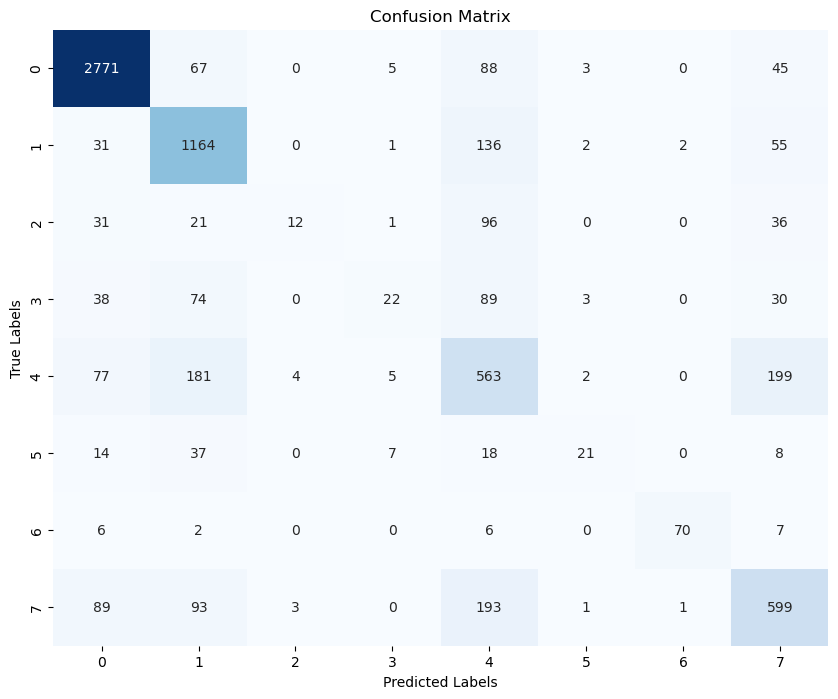

Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.93      0.92      2979
           2       0.71      0.84      0.77      1391
           3       0.63      0.06      0.11       197
           4       0.54      0.09      0.15       256
           5       0.47      0.55      0.51      1031
           6       0.66      0.20      0.31       105
           7       0.96      0.77      0.85        91
           8       0.61      0.61      0.61       979

    accuracy                           0.74      7029
   macro avg       0.69      0.51      0.53      7029
weighted avg       0.74      0.74      0.72      7029



['rf_model_3.joblib']

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

#plotting
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

In [ ]:
# based on above model, we will try to improve presion by feature enineering, hyperprarameter tuning
#and using ensemble methords

In [35]:
from sklearn.model_selection import GridSearchCV

#hyperparameters
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

#fit grid search
grid_search.fit(X_train, y_train)

#hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_classifier = grid_search.best_estimator_

y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.7464788732394366
Confusion Matrix:
 [[2764   66    0    5   94    4    1   45]
 [  25 1172    0    1  134    2    1   56]
 [  31   17    9    0   96    0    0   44]
 [  33   76    0   21   92    2    0   32]
 [  71  180    1    5  582    1    1  190]
 [  11   38    0    4   22   22    0    8]
 [   6    1    0    0    9    0   72    3]
 [  85   90    1    1  196    0    1  605]]
Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.93      0.92      2979
           2       0.71      0.84      0.77      1391
           3       0.82      0.05      0.09       197
           4       0.57      0.08      0.14       256
           5       0.48      0.56      0.52      1031
           6       0.71      0.21      0.32       105
           7       0.95      0.79      0.86        91
           8       0.62      0.62      0

In [36]:
# extracting important features to be used for improving our model

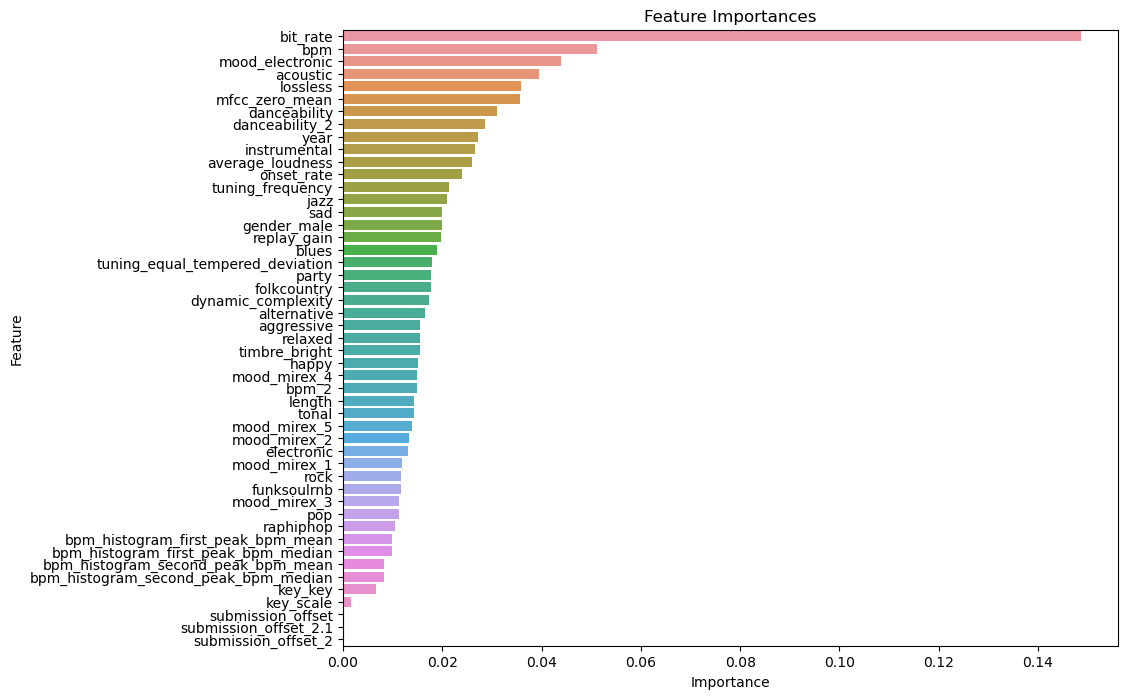

In [37]:
#feature importances
feature_importances = best_rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [38]:
#top features
top_n = 10 
print("Top", top_n, "most important features:")
print(feature_importance_df.head(top_n))

Top 10 most important features:
            Feature  Importance
26         bit_rate    0.148637
30              bpm    0.051193
13  mood_electronic    0.043883
11         acoustic    0.039587
28         lossless    0.035935
48   mfcc_zero_mean    0.035652
0      danceability    0.031028
38   danceability_2    0.028530
31             year    0.027271
25     instrumental    0.026512


In [39]:
#improving model beased on most important features only

In [40]:
from sklearn.feature_selection import SelectFromModel

#feature selector
feature_selector = SelectFromModel(best_rf_classifier, threshold='mean')
feature_selector.fit(X_train, y_train)
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)
best_rf_classifier_selected = RandomForestClassifier(random_state=42)
best_rf_classifier_selected.fit(X_train_selected, y_train)

y_pred_selected = best_rf_classifier_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
conf_matrix_selected = confusion_matrix(y_test, y_pred_selected)
class_report_selected = classification_report(y_test, y_pred_selected)

print("Accuracy with selected features:", accuracy_selected)
print("Confusion Matrix with selected features:\n", conf_matrix_selected)
print("Classification Report with selected features:\n", class_report_selected)

dump(best_rf_classifier_selected, "best_random_forest_model_selected.joblib")

Accuracy with selected features: 0.7597097737942808
Confusion Matrix with selected features:
 [[2797   56    1    6   64    5    0   50]
 [  24 1202    0    3  115    1    1   45]
 [  35   17   26    4   75    0    0   40]
 [  28   75    1   44   68    3    0   37]
 [  70  183    7    4  584    2    0  181]
 [   7   42    0    6   24   19    0    7]
 [   4    2    0    0    5    0   75    5]
 [  85  103    5    2  186    3    2  593]]
Classification Report with selected features:
               precision    recall  f1-score   support

           1       0.92      0.94      0.93      2979
           2       0.72      0.86      0.78      1391
           3       0.65      0.13      0.22       197
           4       0.64      0.17      0.27       256
           5       0.52      0.57      0.54      1031
           6       0.58      0.18      0.28       105
           7       0.96      0.82      0.89        91
           8       0.62      0.61      0.61       979

    accuracy              

['best_random_forest_model_selected.joblib']